In [56]:
import pickle
import numpy as np
from sklearn.cluster import SpectralClustering, AffinityPropagation

# file_path = '/media/zzs/4TB/qingliu/qing_intermediate/feat_pickle/'
# file_path = '/export/home/qliu24/qing_voting_data/qing_intermediate/feat_pickle/'
file_path = '/mnt/4T-HD/qing/voting_data/feat_pickle/'
fname = file_path + 'all_simmat_067.pickle'
with open(fname, 'rb') as fh:
    mat_dis1, mat_dis2 = pickle.load(fh)
    
print(mat_dis1.shape)


asp_ratio = []
types = []
view_point = []
objects = ['car', 'aeroplane', 'bicycle', 'bus', 'motorbike', 'train']
for oo in objects:
    fname = file_path + 'res_info_' + oo + '_train.pickle'
    print('loading object {0}'.format(oo))
    with open(fname, 'rb') as fh:
        l, _, v = pickle.load(fh)
        types += [oo for ii in range(len(v))]
        view_point += v
        asp_ratio += [l[ii].shape[1]/l[ii].shape[2] for ii in range(len(v))]
        
N = len(types)
print('total number of instances {0}'.format(N))

'''
asp_ratio = []
types = []
view_point = []
oo='car'
fname = file_path + 'res_info_' + oo + '_train.pickle'
print('loading object {0}'.format(oo))
with open(fname, 'rb') as fh:
    l, _, v = pickle.load(fh)
    types += [oo for ii in range(len(v))]
    view_point += v
    asp_ratio += [l[ii].shape[1]/l[ii].shape[2] for ii in range(len(v))]
    
N = len(types)
print('total number of instances {0}'.format(N))
'''
oo='train'
# oo2='motorbike'
id_obj = np.where(np.array(types)==oo)[0]
# id_obj2 = np.where(np.array(types)==oo2)[0]
id_obj2=np.array([]).astype(int)
types = np.array(types)[np.append(id_obj, id_obj2)]
view_point = np.array(view_point)[np.append(id_obj, id_obj2)]
asp_ratio = np.array(asp_ratio)[np.append(id_obj, id_obj2)]
gridix = np.ix_(np.append(id_obj, id_obj2), np.append(id_obj, id_obj2))
mat_dis = mat_dis1[gridix]
N = len(types)
print('total number of instances {0}'.format(N))

(3549, 3549)
loading object car
loading object aeroplane
loading object bicycle
loading object bus
loading object motorbike
loading object train
total number of instances 3549
total number of instances 495


In [57]:
# mat_dis = mat_dis1[0:N, 0:N]
mat_full = np.ones_like(mat_dis)
for nn in range(mat_full.shape[0]):
    mat_full[nn] = np.append(mat_dis[0:nn, nn], mat_dis[nn, nn:])
    
print(mat_full[0:10,0:10])

np.fill_diagonal(mat_full, 0)

W_mat = 1. - mat_full
print(np.mean(W_mat))
print(np.std(W_mat))

[[ 1.          0.97611876  0.91590909  1.          1.          1.
   0.92594538  0.98392857  0.94101449  0.95259573]
 [ 0.97611876  1.          0.92676768  0.91690519  0.96636364  0.99064685
   0.95944056  0.96766623  0.90791063  0.91936607]
 [ 0.91590909  0.92676768  1.          1.          1.          1.
   0.95584416  0.90282132  0.92543293  0.89085624]
 [ 1.          0.91690519  1.          1.          0.94527778  1.
   0.96580024  0.9017617   1.          1.        ]
 [ 1.          0.96636364  1.          0.94527778  1.          0.95410256
   1.          0.9045614   1.          0.9491342 ]
 [ 1.          0.99064685  1.          1.          0.95410256  1.
   0.99106008  0.98512146  1.          0.98318479]
 [ 0.92594538  0.95944056  0.95584416  0.96580024  1.          0.99106008
   1.          0.97123976  0.98561077  0.95175897]
 [ 0.98392857  0.96766623  0.90282132  0.9017617   0.9045614   0.98512146
   0.97123976  1.          0.92928536  0.88785111]
 [ 0.94101449  0.90791063  0.925

In [58]:
for rr in np.random.randint(N,size=10):
    ref = rr
    print(types[ref], view_point[ref])
    dis_rst = mat_full[rr]
    min_idx = np.argsort(dis_rst)
    for tt in range(5):
        match = min_idx[tt]
        print(types[match], view_point[match], end=' ')
        
    print('.')

train 5.0
train 5.0 train 5.0 train 5.0 train 10.0 train 5.0 .
train 350.0
train 350.0 train 345.0 train 345.0 train 330.0 train 345.0 .
train 10.0
train 10.0 train 10.0 train 15.0 train 355.0 train 20.0 .
train 355.0
train 355.0 train 355.0 train 335.0 train 355.0 train 355.0 .
train 350.0
train 350.0 train 355.0 train 350.0 train 350.0 train 350.0 .
train 5.0
train 5.0 train 5.0 train 5.0 train 5.0 train 5.0 .
train 345.0
train 345.0 train 335.0 train 350.0 train 350.0 train 350.0 .
train 15.0
train 15.0 train 15.0 train 10.0 train 15.0 train 10.0 .
train 5.0
train 5.0 train 45.0 train 5.0 train 10.0 train 10.0 .
train 5.0
train 5.0 train 350.0 train 5.0 train 5.0 train 15.0 .


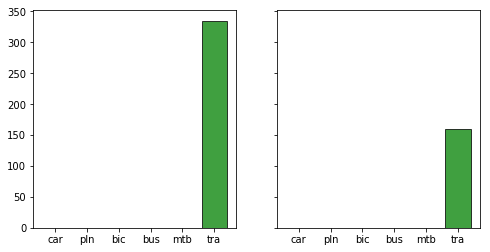

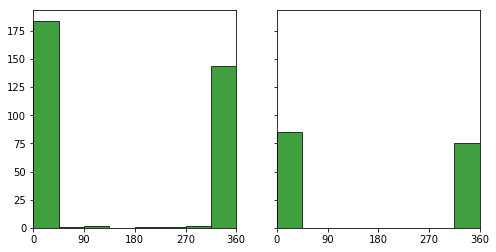

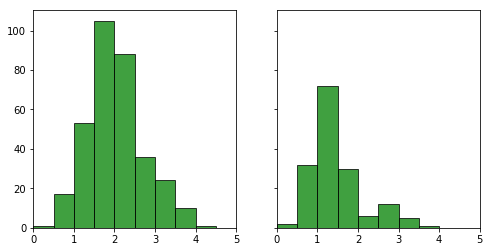

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

K = 2
cls_solver = SpectralClustering(n_clusters=K,affinity='precomputed', random_state=666)
lb = cls_solver.fit_predict(W_mat)
# af = AffinityPropagation(preference=0.00005, affinity = 'precomputed').fit(W_mat)
# cluster_centers_indices = af.cluster_centers_indices_
# lb = af.labels_
# print(np.unique(lb))

f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(8,4))
objects_s = ['car','pln','bic','bus','mtb','tra']
pos = np.arange(len(objects_s))
axes[0].set_xticks(pos)
axes[0].set_xticklabels(objects_s)
for k in range(K):
    freq = []
    for oo in objects:
        freq.append(sum(np.array(types)[lb==k]==oo))
        
    axes[k].bar(pos, freq, color='green',alpha=0.75, edgecolor='k')

plt.show()

f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(8,4))
axes[0].set_xlim([0,360])
axes[0].set_xticks([0,90,180,270,360])

for k in range(K):
    axes[k].hist(np.array(view_point)[lb==k], bins=8, range=[0,360], facecolor='green', alpha=0.75,edgecolor='k')

plt.show()

f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(8,4))
axes[0].set_xlim([0,5])
axes[0].set_xticks([0,1,2,3,4,5])

for k in range(K):
    axes[k].hist(np.array(asp_ratio)[lb==k], bins=10, range=[0,5], facecolor='green', alpha=0.75,edgecolor='k')

plt.show()



In [60]:
np.mean(W_mat)

0.037769724176115481

0.0405930029494 0.0650221219753
0.0711078386102 0.0921789954601


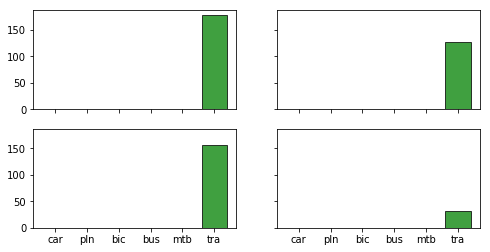

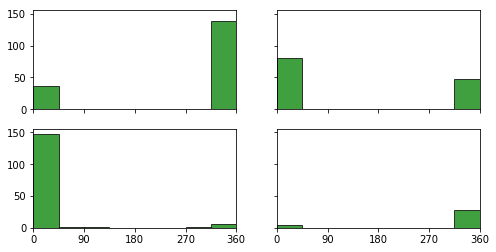

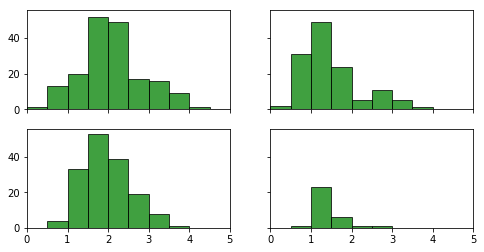

In [61]:
idx2 = []
W_mat2 = []
lb2 = []
for k in range(K):
    idx2.append(np.where(lb==k)[0])
    W_mat2.append(W_mat[np.ix_(idx2[k],idx2[k])])
    print(np.mean(W_mat2[k]), np.std(W_mat2[k]))
    
    cls_solver = SpectralClustering(n_clusters=2,affinity='precomputed', random_state=999)
    lb2.append(cls_solver.fit_predict(W_mat2[k]))
    
K2=2
f, axes = plt.subplots(2,K, sharex=True, sharey=True, figsize=(8,4))
objects_s = ['car','pln','bic','bus','mtb','tra']
pos = np.arange(len(objects_s))
axes[0][0].set_xticks(pos)
axes[0][0].set_xticklabels(objects_s)
for k in range(K2*K):
    a = k//2
    b = k%2
    freq = []
    for oo in objects:
        freq.append(sum(np.array(types)[idx2[a]][lb2[a]==b]==oo))
        
    axes[b][a].bar(pos, freq, color='green',alpha=0.75, edgecolor='k')

plt.show()

f, axes = plt.subplots(2,K, sharex=True, sharey=True, figsize=(8,4))
axes[0][0].set_xlim([0,360])
axes[0][0].set_xticks([0,90,180,270,360])
for k in range(K2*K):
    a = k//2
    b = k%2
    axes[b][a].hist(np.array(view_point)[idx2[a]][lb2[a]==b], bins=8, range=[0,360], facecolor='green', alpha=0.75, edgecolor='k')

plt.show()

f, axes = plt.subplots(2,K, sharex=True, sharey=True, figsize=(8,4))
axes[0][0].set_xlim([0,5])
axes[0][0].set_xticks([0,1,2,3,4,5])
for k in range(K2*K):
    a = k//2
    b = k%2
    axes[b][a].hist(np.array(asp_ratio)[idx2[a]][lb2[a]==b], bins=10, range=[0,5], facecolor='green', alpha=0.75, edgecolor='k')

plt.show()

In [54]:
rst_lbs1 = np.ones(len(idx2[0]))*-1
rst_lbs1[np.where(lb2[0]==0)[0]] = 0
rst_lbs1[np.where(lb2[0]==1)[0]] = 1
rst_lbs2 = np.ones(len(idx2[1]))*-1
rst_lbs2[np.where(lb2[1]==0)[0]] = 2
rst_lbs2[np.where(lb2[1]==1)[0]] = 3


rst_lbs = np.ones(N)*-1
rst_lbs[idx2[0]] = rst_lbs1
rst_lbs[idx2[1]] = rst_lbs2

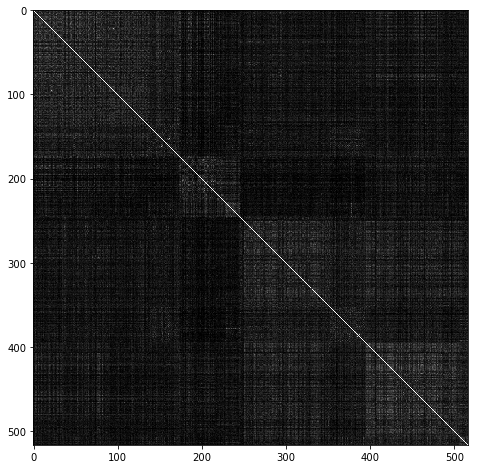

In [55]:
_idx = np.array([]).astype(int)
for kk in range(4):
    iidx = np.where(rst_lbs==kk)[0]
    _idx = np.append(_idx, iidx)
    
grid_ix = np.ix_(_idx, _idx)
plt.close()
plt.imshow(W_mat[grid_ix], interpolation='none')
plt.show()

In [52]:
fname = '/media/zzs/4TB/qingliu/qing_intermediate/unary_weights/motorbike_k2_2_lbs.pickle'
with open(fname, 'wb') as fh:
    pickle.dump(rst_lbs, fh)